# Волоконный интерферометр 

Цель работы – знакомство с устройством интерферометра Маха-Цендера, реализация интерферометра с помощью волоконной оптики, исследование параметров интерферометра Маха-Цендера, нахождение видности интерференционной картины в однофотонном режиме и полуволнового напряжения электрооптического модулятора

## Задание 4.2.1
#### Определить в каком такте ожидать отраженный импульс, записать это значение

Исходя из предположения, что в телекоммуникационных волоконно-оптических линиях свет проходит 1 м за 5 нс. И того, что катушка -50 км (в одну сторону), то составим пропорцию. 
$$\frac{10^5 м}{x} = \frac{1 м}{5\cdot 10^{-9}c} $$
Отсюда $$x = 5\cdot10{-4}c$$
Зная, что период следования импульсов из источника - 200 нс, то импульс, который нам нужен будет по счёту 
$$N = \frac{x}{2\cdot10^{-7}} = 2500 $$

### Задание 4.2.2
#### Выставляя значения в соответствующих полях интерфейса, сформировать трейн периодом на 200-300 тактов больше определенного значения; сформировать последовательность из 2000-4000 одноимпульсных трейнов. Запустить генерацию трейнов, локализовать на гистограмме отражение на зеркале Фарадея (рисунок 7), записать номер такта отражения N_f. Увеличивая значение аттенюации лазера, добиться, чтобы величина найденного рефлекса была примерно в 10 раз меньше количества отправленных трейнов. Запишите полученное число.

Аттенюация - 5 дб

In [1]:
N_imp = 3000
N_f = 2520 # Номер такта отражения 

### Задание 4.2.3
#### Типичное значение полуволнового напряжения для телекоммуникационных фазовых модуляторов – 3,5 В. Определите, какое число (от 0 до 512) (Mod_sett) надо подать на ЦАП драйвера для установки напряжения 3,5 В, введите это число в соответствующее поле. Введите такие значения полей modulator.start (N_start)и modulator.stop(N_stop), чтобы к лазерному импульсу прикладывался полуволновой сдвиг на пути обратно. Запустите генерацию, проверьте, что величина рефлекса заметно уменьшилась. Запишите полученное число.

Так как плечи модулятора не равны дру другу, то при 0(выключенном модуляторе) наблюдается не максимум интенсивности, как должно быть 

In [2]:
N_start = 2500 
N_stop = 3500
Mod_sett = 265

### Задание 4.2.4
#### Проделайте измерения величины отраженного рефлекса, изменяя число, подаваемое на ЦАП, в пределах от 0 до 500 с шагом 25, результаты измерений оформите в виде таблицы. По полученной таблице постройте график. На данном графике найдите значение первого минимума min X , на оси х, это значение должно быть вблизи числа, найденного в задании3.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
# 1 столбец - настройки модулятора
# 2 столбец - измеренное значение отраженного рефлекса
# 3 столбец - погрешность(половина цены деления)
data =  np.array([[0.,   10.,   0.5], 
                  [25.,  110., 50.],
                  [50.,  380., 50.],  
                  [75.,  590., 50.],
                  [100., 900., 50.],
                  [125., 910., 50.],
                  [150., 900., 50.],
                  [175., 710., 50.],
                  [200., 430., 50.],
                  [225., 200., 50.],
                  [250., 45.,  50.],
                  [275., 9.,   0.5],
                  [300., 150., 50.],
                  [325., 350., 50.],
                  [350., 620., 50.],
                  [375., 800., 50.],
                  [400., 850., 50.],
                  [425., 820., 50.],
                  [450., 720., 50.],
                  [475., 500., 50.],
                  [500., 300., 50.]])
min_ind = np.argmin(data[:, 1])
print(f'Значение настроек модулятора при минимуме = {data[min_ind, 0]}')
print(f'Значение отраженного рефлекса  = {data[min_ind, 1]}')
print(f'Значение погрешности  = {data[min_ind, 2]}')

Значение настроек модулятора при минимуме = 275.0
Значение отраженного рефлекса  = 9.0
Значение погрешности  = 0.5


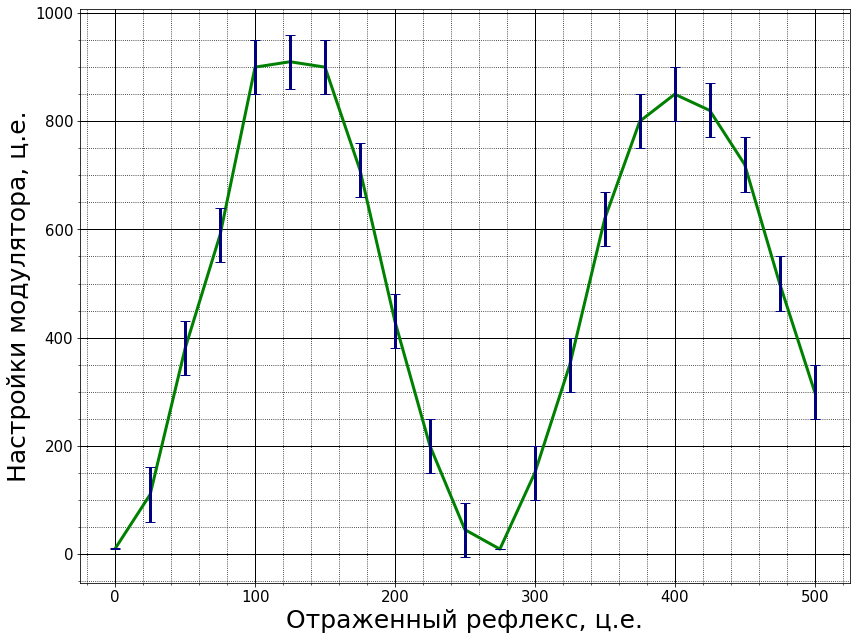

In [4]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('Настройки модулятора, ц.е.',fontweight='light',color='k', fontsize=25)
ax.set_xlabel("Отраженный рефлекс, ц.е.",fontweight='light',color='k', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()
ax.errorbar(data[:,0],data[:, 1], color='g', yerr=data[:, 2], ecolor = "navy", 
            fmt='-o',barsabove=True,
            ms=0, capsize = 5,
            linewidth=3,
            elinewidth = 3)
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.tight_layout()
fig.savefig(os.path.join(sys.path[0]+'/plots', 'task_4.png'))

### Задание 4.2.5
#### Проделайте дополнительные измерения зависимости величины рефлекса от числа, подаваемого на ЦАП в интервале от min X -30 до min X +30 с шагом 5. Результаты измерений оформите в виде таблицы. По полученной таблице постройте график. Из полученного графика найдите более точно число 2min X , соответствующее минимальной величине рефлекса.

In [5]:
data_min = np.array([[235, 120, 50 ],
                     [240, 72,  5  ],
                     [245, 35,  5, ],
                     [250, 38,  5, ],
                     [255, 15,  5, ],
                     [260, 4,   0.5],
                     [265, 1,   0.5],
                     [270, 6,   0.5],
                     [275, 5,   0.5],
                     [280, 30,  5  ],
                     [285, 45,  5  ],
                     [290, 75,  5  ],
                     [295, 120, 50]])
min_ind = np.argmin(data_min[:, 1])
print(f'Значение настроек модулятора при минимуме = {data_min[min_ind, 0]}')
print(f'Значение отраженного рефлекса  = {data_min[min_ind, 1]}')
print(f'Значение погрешности  = {data_min[min_ind, 2]}')

Значение настроек модулятора при минимуме = 265.0
Значение отраженного рефлекса  = 1.0
Значение погрешности  = 0.5


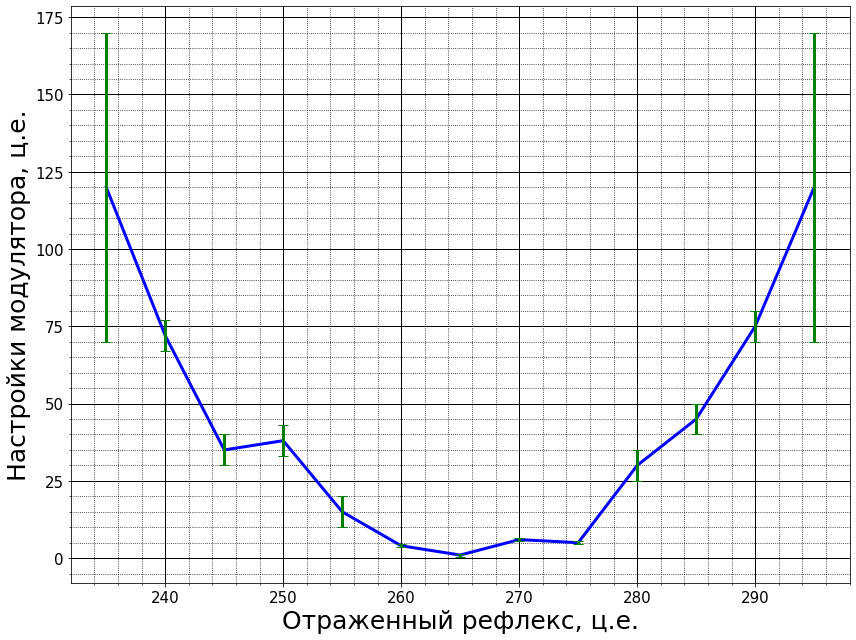

In [6]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('Настройки модулятора, ц.е.',fontweight='light',color='k', fontsize=25)
ax.set_xlabel("Отраженный рефлекс, ц.е.",fontweight='light',color='k', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()
ax.errorbar(data_min[:,0],data_min[:, 1], color='b', yerr=data_min[:, 2], ecolor = "green", 
            fmt='-o',barsabove=True,
            ms=0, capsize = 5,
            linewidth=3,
            elinewidth = 3)
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.tight_layout()
fig.savefig(os.path.join(sys.path[0]+'/plots', 'task_5.png'))

### Задание 4.2.6
#### Сделайте 5 измерений интенсивности max I , подавая на ЦАП драйвера 0; и 5 измерений интенсивности min I , подавая на ЦАП драйвера 2min X . Найдите среднее значения для каждой полученной величины. Используя это средние значения, по формуле (11) найдите видность интерференционной картины. Оцените погрешность найденной величины. Запишите полученную величину видности и найденную погрешность.

Как было указано выше, максимум достигается не при 0. Поэтому эмперически было обнаружено, что 0 сдвиг фаз между плечами интерферометра достигается при настройках модулятора = 125, из прошлых заданий, минимум достигается при 265. 

In [7]:
I_max = np.array([960,1000,980,930,900])
I_min = np.array([3,3,5,10,3])
D_I_max_mes = 50
D_I_min_mes = 0.5
# функция статистической погрешности
from scipy.stats import t
import math
def stat_error(data, conf_prob):
    #conf_prob - Доверительная вероятность  
    n = len(data)
    student_coef = round(t.ppf((1 + conf_prob )/2, n - 1), 2)
    var = np.var(data)
    interval = student_coef * math.sqrt((var)/n)
    return interval
D_I_max_stat = stat_error(I_max, conf_prob=0.66)
D_I_min_stat = stat_error(I_min, conf_prob=0.66)

#так как погрешность измерений сравнима со статистстической, то итоговая погрешность будет выглядеть так 
D_I_max = np.sqrt(D_I_max_mes**2 + D_I_max_stat**2)
D_I_min = np.sqrt(D_I_min_mes**2 + D_I_min_stat**2)

I_max_mean = np.mean(I_max)
I_min_mean = np.mean(I_min)

print(f'Максимальная интенсивность = {I_max_mean} +- {D_I_max}')
print(f'Минимальная интенсивность = {I_min_mean} +- {D_I_min}')
#В отчёте нужно написать по правилам погрешностей, а не как я вывел

Максимальная интенсивность = 954.0 +- 52.86649146671264
Минимальная интенсивность = 4.8 +- 1.4024766664725659


In [8]:
#Видность 
V = (I_max_mean - I_min_mean)/(I_max_mean + I_min_mean) 
#зная погрешность I_min_mean и  I_max_mean, используя формулу ниже получаем 
D_V = np.sqrt((2*I_min_mean*D_I_max/(I_max_mean + I_min_mean)**2)**2 + (-2*I_max_mean*D_I_min/(I_max_mean + I_min_mean)**2)**2)

$$\Delta V = \sqrt{(\frac{\partial V}{\partial I_{max}}\cdot\Delta I_{max})^2 + (\frac{\partial V}{\partial I_{min}}\cdot\Delta I_{min})^2}$$

In [9]:
print(f'Видность V = {V}+-{D_V}')

Видность V = 0.9899874843554444+-0.0029627282167413796


## Задание 4.3 
#### Нахождение видности интерференции с учетом шума детектора одиночных фотонов
Детектор одиночных фотонов иногда дает ложные срабатывания, дажекогда на него не подается излучение. Чтобы сделать поправку для найденной величины интенсивности, можно проделать те же измерения с нулевым количеством лазерных импульсов в трейне.

### Задание 4.3.1
#### Подайте 0 на ЦАП драйвера модулятора, сделайте 5 измерений количества ложных срабатываний для такта N_f , найдите среднее значение интенсивности темнового счета D

По причинам, озвученным выше, на модулятор выставили 125

In [10]:
I_drk = np.array([1,1,1,2,1])
D_I_dark_stat = stat_error(I_drk, conf_prob=0.66)
D_I_drk_mes = 0.5
D_I_drk = np.sqrt(D_I_dark_stat**2 + D_I_drk_mes**2)
I_drk_mean = np.mean(I_drk)
print(f'Среднее значение интенсивности Темнового счёта = {I_drk_mean}+-{D_I_drk} ')

Среднее значение интенсивности Темнового счёта = 1.2+-0.5360268649983879 


### Задание 4.3.2
#### Найдите новую величину видности интерферометра с поправкой на темновой счет детектора. Запишите полученную величину с учетом погрешности.

из полученных ранее значений нужно вычесть поправку 

In [11]:
I_max_mean = I_max_mean - I_drk_mean
I_min_mean = I_min_mean - I_drk_mean
V = (I_max_mean - I_min_mean)/(I_max_mean + I_min_mean) 
# так как погрешность поправки половина деления, то сильного влияния на видность она не окажет,
# погрешность можно оставить ту же
print(f'Видность с поправкой  V  = {V}+-{D_V}')

Видность с поправкой  V  = 0.9924717691342534+-0.0029627282167413796
